In [1]:
%matplotlib widget 
import sys
sys.path.insert(0,'../')
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/dipole_facet_config.yaml')

start reinterpolation. number of slice 1


In [3]:
testCSR.run()

Starting the DFCSR run
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\facet_obed-2024-06-17T18_32_39-07_00-wakes.h5
Finish step 1, s = 0.05,  in 3.776479959487915 seconds
Finish step 2, s = 0.1,  in 2.1265435218811035 seconds
Finish step 3, s = 0.15000000000000002,  in 2.3457064628601074 seconds
Finish step 4, s = 0.2,  in 2.3445470333099365 seconds
Finish step 5, s = 0.25,  in 2.462155818939209 seconds
Finish step 6, s = 0.3,  in 2.428206205368042 seconds
Finish step 7, s = 0.35,  in 2.4168810844421387 seconds
Finish step 8, s = 0.39999999999999997,  in 2.38930344581604 seconds
Finish step 9, s = 0.44999999999999996,  in 2.4725430011749268 seconds
Finish step 10, s = 0.49999999999999994,  in 2.9585459232330322 seconds
Finish step 11, s = 0.5499999999999999,  in 3.124786615371704 seconds
Finish step 12, s = 0.6,  in 3.0458407402038574 seconds
Finish step 13, s = 0.65,  in 3.0864808559417725 seconds
Finish step 14, s = 0.7000000000000001,  in 3.09053778648376

## Parallel Run with MPI

In [4]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [4]:
from postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'facet_obed-2024-06-17T18_32_39-07_00',
                             work_dir = './output')

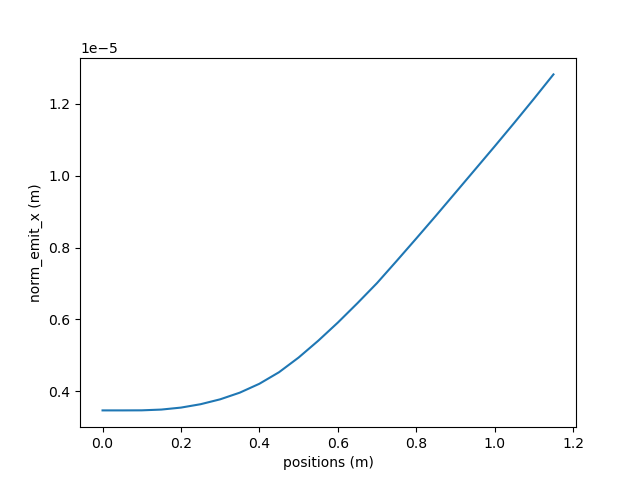

In [5]:
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)


plot longitudinal wakes at nearest point s  = 0.2 m, step count 4
ebeam energy 9856000000.0


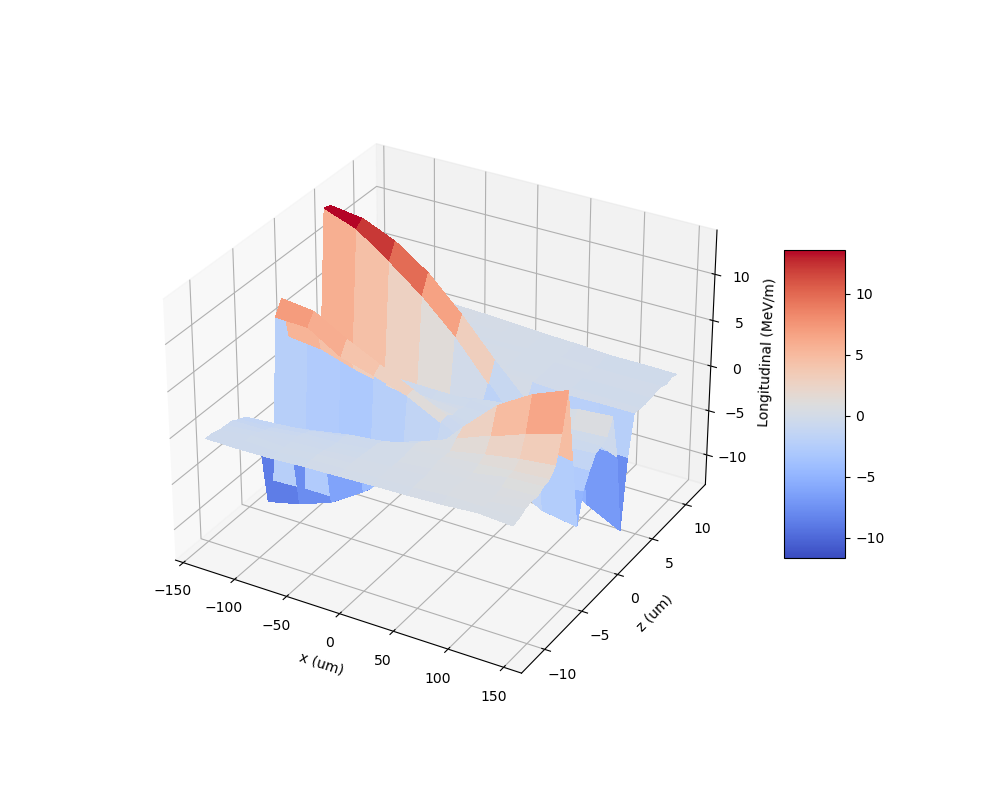

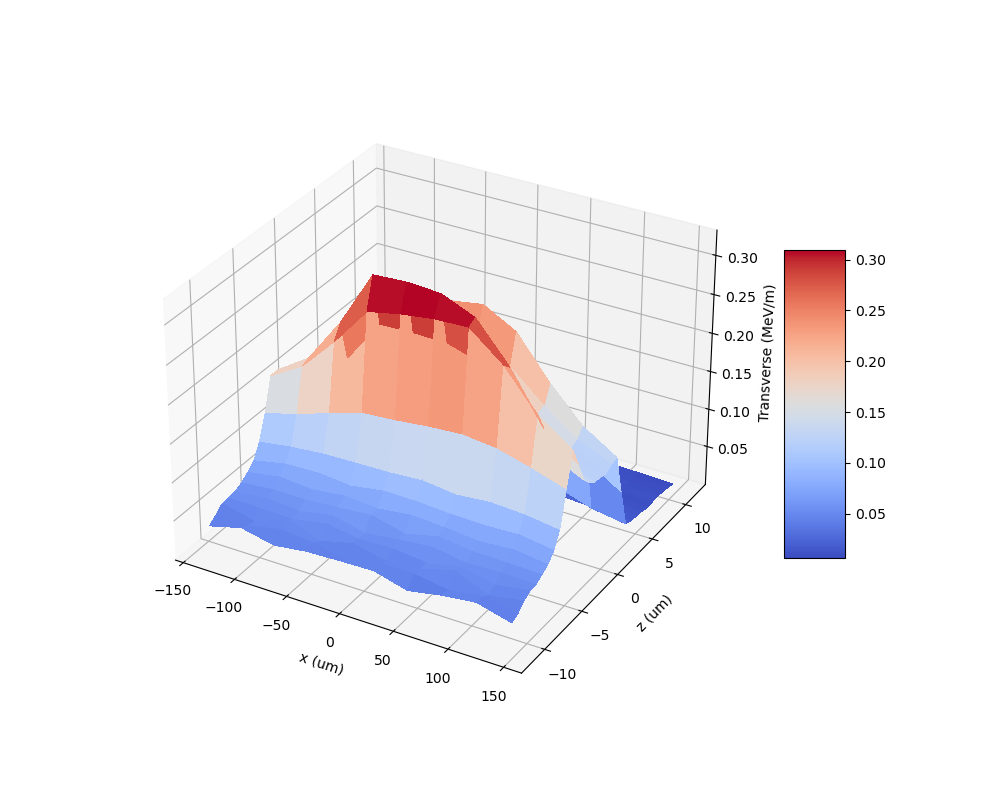

In [7]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s =0.2, show_plot = True)

Reading  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output/facet_obed-2024-06-17T18_32_39-07_00-particles-end.h5


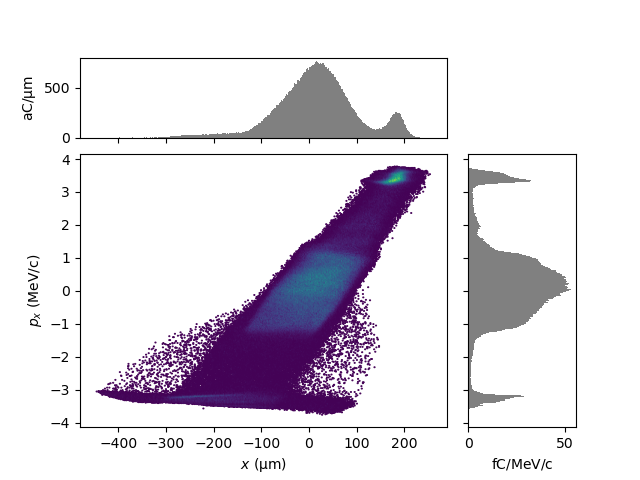

In [8]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles()
pg.plot('x', 'px')